In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import pandas.util.testing as tm
import math
from scipy.stats import ttest_ind


/public/apps/python/3.7.0/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
#The first cell just reads in and prepares data
#The output dataframes are rna_data and protein_data 


# RNA expression data
ccle_rna_data = pd.read_csv('/home/sgomrok/Integrin_Exp/CCLE/Primary_vs_Metastatsis/CCLE_expression.csv',sep=",")
# Proteomic data
ccle_p_data = pd.read_csv('/home/sgomrok/Integrin_Exp/CCLE/Primary_vs_Metastatsis/protein_quant_current_normalized.csv',sep=",")


# These columns were for the standardization of the data and do not have relevant biological data.
drop_columns = ['TenPx01_Peptides', 'TenPx02_Peptides', 'TenPx03_Peptides', 'TenPx04_Peptides', 'TenPx06_Peptides',
                'TenPx07_Peptides', 'TenPx08_Peptides', 'TenPx09_Peptides', 'TenPx10_Peptides', 'TenPx11_Peptides',
                'TenPx12_Peptides', 'TenPx13_Peptides', 'TenPx16_Peptides', 'TenPx17_Peptides', 'TenPx19_Peptides',
                'TenPx20_Peptides', 'TenPx21_Peptides', 'TenPx22_Peptides', 'TenPx27_Peptides', 'TenPx28_Peptides',
                'TenPx29_Peptides', 'TenPx33_Peptides', 'TenPx34_Peptides', 'TenPx35_Peptides', 'TenPx36_Peptides',
                'TenPx37_Peptides', 'TenPx38_Peptides', 'TenPx39_Peptides', 'TenPx40_Peptides', 'TenPx42_Peptides',
                'TenPx23_Peptides', 'TenPx05_Peptides', 'TenPx30_Peptides', 'TenPx31_Peptides', 'TenPx32_Peptides',
                'TenPx14_Peptides', 'TenPx15_Peptides', 'TenPx41_Peptides', 'TenPx26_Peptides', 'TenPx25_Peptides',
                'TenPx18_Peptides', 'TenPx24_Peptides']
all_data = ccle_p_data.drop(drop_columns,axis=1)


# There were a couple of cases where they measured the same cell line twice.
# On the DepMap portal, they show these as the average of the two measures. I will do the same thing here 
# to keep the data consistent with the DepMap portal
temp_a = all_data["CAL120_BREAST_TenPx02"]
temp_b = all_data["CAL120_BREAST_TenPx28"]
temp = []

for i in range(len(temp_a)):
#   if both have nan value, insert a nan value in the new column
    if np.isnan(temp_a.iloc[i]) and np.isnan(temp_b.iloc[i]):
        temp.append(np.nan)
        
#   if one of them has a none-nan value (any numeric value), insert that value in the new column
    elif np.isnan(temp_a.iloc[i]):
        temp.append(temp_b.iloc[i])
    elif np.isnan(temp_b.iloc[i]):
        temp.append(temp_a.iloc[i])
        
#   if both have a numeric value, insert the average of the two in the new column
    else:
        temp.append((temp_a.iloc[i] + temp_b.iloc[i])/2)
all_data = all_data.drop(["CAL120_BREAST_TenPx02","CAL120_BREAST_TenPx28"],axis=1)
all_data["CAL120_BREAST_TenPx0228"] = temp




temp_a = all_data["HCT15_LARGE_INTESTINE_TenPx30"]
temp_b = all_data["HCT15_LARGE_INTESTINE_TenPx18"]
temp = []
for i in range(len(temp_a)):
    if np.isnan(temp_a.iloc[i]) and np.isnan(temp_b.iloc[i]):
        temp.append(np.nan)
    elif np.isnan(temp_a.iloc[i]):
        temp.append(temp_b.iloc[i])
    elif np.isnan(temp_b.iloc[i]):
        temp.append(temp_a.iloc[i])
    else:
        temp.append((temp_a.iloc[i] + temp_b.iloc[i])/2)        
all_data = all_data.drop(["HCT15_LARGE_INTESTINE_TenPx30","HCT15_LARGE_INTESTINE_TenPx18"],axis=1)
all_data["HCT15_LARGE_INTESTINE_TenPx3018"] = temp



temp_a = all_data["SW948_LARGE_INTESTINE_TenPx11"]
temp_b = all_data["SW948_LARGE_INTESTINE_TenPx20"]
temp = []
for i in range(len(temp_a)):
    if np.isnan(temp_a.iloc[i]) and np.isnan(temp_b.iloc[i]):
        temp.append(np.nan)
    elif np.isnan(temp_a.iloc[i]):
        temp.append(temp_b.iloc[i])
    elif np.isnan(temp_b.iloc[i]):
        temp.append(temp_a.iloc[i])
    else:
        temp.append((temp_a.iloc[i] + temp_b.iloc[i])/2)
all_data = all_data.drop(["SW948_LARGE_INTESTINE_TenPx11","SW948_LARGE_INTESTINE_TenPx20"],axis=1)
all_data["SW948_LARGE_INTESTINE_TenPx1120"] = temp



protein_data = all_data.copy()

rna_data = ccle_rna_data.T
rna_data.columns = rna_data.iloc[0]
rna_data.drop('Unnamed: 0',axis=0, inplace=True)

new_index = {}
for index in rna_data.index.values:
    new_index[index] = index.split(' ')[0]
rna_data.rename(new_index, axis = 0, inplace=True)
#ccle_rna_data_backup = rna_data.copy()

In [11]:
#hossain
ccle_rna_data.index=ccle_rna_data.iloc[:,0]
ccle_rna_data = ccle_rna_data.iloc[:,1:]
ccle_rna_data

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,ARHGAP11B (89839),AC004593.2 (1124),AC090517.4 (54816),AL160269.1 (11046),ABCF2-H2BE1 (114483834),POLR2J3 (548644),H2BE1 (114483833),AL445238.1 (647264),GET1-SH3BGR (106865373),AC113348.1 (102724657)
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ACH-001113,4.990501,0.000000,7.273702,2.765535,4.480265,0.028569,1.269033,3.058316,6.483171,5.053980,...,1.214125,0.000000,0.111031,0.150560,1.427606,5.781884,0.000000,0.000000,0.799087,0.000000
ACH-001289,5.209843,0.545968,7.070604,2.538538,3.510962,0.000000,0.176323,3.836934,4.200850,3.832890,...,1.835924,0.000000,0.310340,0.000000,0.807355,4.704319,0.000000,0.000000,0.464668,0.070389
ACH-001339,3.779260,0.000000,7.346425,2.339137,4.254745,0.056584,1.339137,6.724241,3.671293,3.775051,...,1.823749,0.084064,0.176323,0.042644,1.384050,4.931683,0.000000,0.028569,0.263034,0.000000
ACH-001538,5.726831,0.000000,7.086189,2.543496,3.102658,0.000000,5.914565,6.099716,4.475733,4.294253,...,0.871844,0.137504,0.263034,2.485427,0.713696,3.858976,0.000000,0.000000,0.000000,0.000000
ACH-000242,7.465648,0.000000,6.435462,2.414136,3.864929,0.831877,7.198003,5.452530,7.112492,4.710944,...,2.324811,0.163499,0.163499,0.000000,1.117695,4.990501,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000750,4.173127,0.000000,6.400879,1.807355,3.303050,0.014355,0.137504,4.944858,4.528571,4.383359,...,1.280956,0.176323,0.084064,0.000000,2.615887,5.102658,0.000000,0.097611,0.214125,0.000000
ACH-000285,0.097611,0.000000,6.428276,3.257011,4.980482,0.411426,0.124328,0.704872,4.829342,5.393348,...,2.939227,0.000000,0.014355,0.000000,3.326250,6.341630,0.000000,0.000000,0.310340,0.000000
ACH-001858,5.045268,0.000000,6.991749,1.807355,3.270529,0.028569,3.333424,6.819796,5.395063,3.727920,...,1.510962,0.056584,0.097611,0.286881,1.925999,4.607626,0.111031,0.000000,1.090853,0.000000


In [6]:
#Now filter out to get the integrins
# And don't include the integrin binding proteins.

integrins_protein_data = pd.DataFrame(columns=protein_data.columns)


for i in range(protein_data.shape[0]):
    
#   if in that specific row the value of "Gene_Symbol" is not nan
    if pd.notna(protein_data.iloc[i]["Gene_Symbol"]):
        
#       if that specific "Gene_Symbol" has the first three characters as "ITG"
        if protein_data.iloc[i]["Gene_Symbol"][0:3] == 'ITG':
        
#           if that specific integrin is not one of the integrin binding proteins
            if protein_data.iloc[i]["Gene_Symbol"] not in ["ITGB3BP","ITGB1BP1"]:
                integrins_protein_data = integrins_protein_data.append(protein_data.iloc[i])

integrins_protein_data.sort_values('Gene_Symbol', inplace = True)
# integrins_protein_data = integrins_protein_data.append(protein_data.loc[protein_data['Gene_Symbol'] == 'CD44'])
# integrins_protein_data = integrins_protein_data.append(protein_data.loc[protein_data['Gene_Symbol'] == 'ERBB2'])
# integrins_protein_data = integrins_protein_data.append(protein_data.loc[protein_data['Gene_Symbol'] == 'EPCAM'])


integrins_protein_data
            
integrins_rna_data = pd.DataFrame(columns = rna_data.columns)
for i in range(rna_data.shape[0]):
    if rna_data.iloc[i].name[0:3] == 'ITG':
        if rna_data.iloc[i].name not in ["ITGB3BP","ITGB1BP2","ITGB1BP1"]:
            integrins_rna_data = integrins_rna_data.append(rna_data.iloc[i])

integrins_rna_data.sort_index(0, inplace = True)
# integrins_rna_data = integrins_rna_data.append(rna_data[rna_data.index.str.contains('CD44')])
# integrins_rna_data = integrins_rna_data.append(rna_data[rna_data.index.str.contains('ERBB2')])
# integrins_rna_data = integrins_rna_data.append(rna_data[rna_data.index.str.contains('EPCAM')])


In [7]:
# This cell inserts sample info like primary disease or tumor type (primary or metastasis) 
# into the rna and protein dataframes
ccle_sample_info = pd.read_csv('/home/sgomrok/Integrin_Exp/CCLE/Primary_vs_Metastatsis/sample_info.csv')
# ccle_sample_info = ccle_sample_info[ccle_sample_info.primary_disease == 'Breast Cancer']
protein_cols = integrins_protein_data.columns.to_list()

protein_depmap_ids = []
protein_prim_meta = []
protein_primary_disease = []
protein_cell_line = []

for i in range(6):
    protein_depmap_ids.append(protein_cols[i])
    protein_prim_meta.append(protein_cols[i])
    protein_primary_disease.append(protein_cols[i])
    protein_cell_line.append(protein_cols[i])
    
for i in range(6,len(protein_cols)):
#   split the column items of "protein_cols" list (which are separated by "_")
    temp = protein_cols[i].split('_')
#   stick the first and second item of the splitted name together using "_"
    temp = '_'.join(temp[0:-1])
    
#     """
#     temp = '_'.join(temp[0:-1])
#     # this -1 refers to the last item of the list. this is vey helpful in case we don't 
#     # know the length of the list? 
#     # Negative indexing means beginning from the end, -1 refers to the last item,
#     # -2 refers to the second-last item, etc.
#     """
#   store the "DepMap_ID" of those samples that have ["CCLE_Name"] == temp
    dm_id = ccle_sample_info.loc[ccle_sample_info["CCLE_Name"] == temp]["DepMap_ID"].values[0]
#   store the "primary_or_metastasis" status of those samples that have ["CCLE_Name"] == temp
    p_m = ccle_sample_info.loc[ccle_sample_info["CCLE_Name"] == temp]["primary_or_metastasis"].values[0]
#   store the "primary_disease" of those samples that have ["CCLE_Name"] == temp
    prim_dis = ccle_sample_info.loc[ccle_sample_info["CCLE_Name"] == temp]["primary_disease"].values[0]
#   store the "cell line" of those samples that have ["CCLE_Name"] == temp
    c_l = ccle_sample_info.loc[ccle_sample_info["CCLE_Name"] == temp]["cell_line_name"].values[0]
    
    protein_depmap_ids.append(dm_id)
    protein_prim_meta.append(p_m)
    protein_primary_disease.append(prim_dis)
    protein_cell_line.append(c_l)
    
# print(protein_depmap_ids[0:10])
# print(protein_cols[0:10])
# print(protein_prim_meta[0:10])
# print(protein_primary_disease[0:10])

integrins_protein_data = integrins_protein_data.T
integrins_protein_data.insert(0,"primary_or_metastasis",protein_prim_meta,True)
integrins_protein_data.insert(0,"primary_disease",protein_primary_disease,True)
integrins_protein_data.insert(0,"cell_line_name",protein_cell_line,True)
integrins_protein_data.insert(0,"DepMap_ID",protein_depmap_ids,True)

In [ ]:
# there are two measurements of ITGA3 and ITGA6, we change the gene symbole to ITGA3.1 and ITGA3.2 (same for ITGA6)

integrins_protein_data.iloc[1,9]="ITGA3.1"
integrins_protein_data.iloc[1,10]="ITGA3.2"
integrins_protein_data.iloc[1,13]="ITGA6.1"
integrins_protein_data.iloc[1,14]="ITGA6.2"


# now change the column labels according to the new gene symbole values

temp1 = integrins_protein_data.columns
temp2 = integrins_protein_data.iloc[1,:].to_list()
temp2[0:3] = temp1[0:3]

integrins_protein_data.columns = temp2

print(integrins_protein_data.columns)
integrins_protein_data.loc['Gene_Symbol']
integrins_protein_data.to_csv('/home/sgomrok/Integrin_Exp/CCLE/Primary_vs_Metastatsis/integrins_protein_primary_metastasis.csv')


In [5]:
ccle_sample_info = pd.read_csv('/home/sgomrok/Integrin_Exp/CCLE/Primary_vs_Metastatsis/sample_info.csv')

rna_cols = integrins_rna_data.columns.to_list()
integrins_rna_data = integrins_rna_data.T
rna_prim_meta = []
rna_primary_disease = []
rna_cell_line = []
# ran_subtype = []

for i in range(len(rna_cols)):
    p_m = ccle_sample_info.loc[ccle_sample_info["DepMap_ID"] == rna_cols[i]]["primary_or_metastasis"].values[0]
    prim_dis = ccle_sample_info.loc[ccle_sample_info["DepMap_ID"] == rna_cols[i]]["primary_disease"].values[0]
    c_l = ccle_sample_info.loc[ccle_sample_info["DepMap_ID"] == rna_cols[i]]["stripped_cell_line_name"].values[0]
#     st = ccle_sample_info.loc[ccle_sample_info["DepMap_ID"] == rna_cols[i]]["lineage_molecular_subtype"].values[0]
    rna_prim_meta.append(p_m)
    rna_primary_disease.append(prim_dis)
    rna_cell_line.append(c_l)
#     ran_subtype.append(st)

#print(len(rna_prim_meta))
#print(len(rna_primary_disease))
#print(integrins_rna_data.shape)

# integrins_rna_data.insert(0,"lineage_molecular_subtype",ran_subtype,True)
integrins_rna_data.insert(0,"primary_or_metastasis",rna_prim_meta,True)
integrins_rna_data.insert(0,"primary_disease",rna_primary_disease,True)
integrins_rna_data.insert(0,"stripped_cell_line_name",rna_cell_line,True)
integrins_rna_data.index.names = ['ID']

integrins_rna_data.to_csv('/home/sgomrok/Integrin_Exp/CCLE/Primary_vs_Metastatsis/integrins_rna_primary_metastasis.csv')

In [20]:
rna_prim_meta

NameError: name 'rna_prim_meta' is not defined

In [17]:
integrins_rna_data

Unnamed: 0,ACH-001113,ACH-001289,ACH-001339,ACH-001538,ACH-000242,ACH-000708,ACH-000327,ACH-000233,ACH-000461,ACH-000705,...,ACH-000114,ACH-000402,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-001858,ACH-001997,ACH-000052
ITGA1,1.201634,0.097611,3.030336,2.087463,0.263034,0.722466,1.327687,0.545968,0.632268,1.367371,...,3.323370,0.014355,2.405992,0.485427,0.014355,2.324811,0.028569,1.903038,1.536053,2.435629
ITGA10,0.356144,0.389567,1.843984,0.150560,0.263034,0.176323,0.963474,0.263034,0.555816,0.189034,...,0.356144,1.056584,1.695994,0.378512,0.214125,0.432959,1.014355,0.214125,0.097611,0.250962
ITGA11,0.150560,0.097611,2.724650,0.014355,0.014355,0.238787,0.084064,0.042644,0.189034,0.028569,...,1.280956,0.028569,6.740793,0.226509,1.063503,0.014355,0.111031,3.705978,0.014355,0.084064
ITGA2,6.942632,2.863938,3.087463,6.875166,3.770829,2.757023,2.007196,0.367371,2.702658,5.081084,...,5.797791,0.124328,3.747387,1.739848,4.772414,3.469886,0.356144,2.226509,3.565597,0.263034
ITGA2B,1.201634,0.163499,0.275007,0.400538,0.333424,0.014355,1.201634,0.475085,0.970854,1.782409,...,0.632268,0.084064,0.411426,0.782409,0.432959,0.238787,0.163499,0.422233,0.137504,1.021480
ITGA3,7.129180,2.845992,6.714246,8.585864,8.307793,4.945327,5.358959,7.487116,8.249588,7.034744,...,8.046906,4.389567,7.788881,5.697663,0.389567,8.208429,1.257011,8.307383,7.643279,1.189034
ITGA4,3.489286,0.485427,6.428779,0.000000,0.042644,0.070389,0.124328,3.176323,0.084064,0.238787,...,1.042644,3.571677,2.833902,0.263034,0.695994,5.927185,5.906410,1.807355,0.000000,0.739848
ITGA5,3.935460,0.163499,6.374170,3.354734,0.823749,0.464668,2.134221,5.285402,2.563158,3.235727,...,3.758090,0.084064,8.303461,4.583158,4.852998,6.670444,0.333424,6.681730,2.746313,5.615593
ITGA6,6.736740,3.949535,6.916477,6.769640,5.906891,7.132063,3.163499,2.389567,7.337533,7.074998,...,6.219556,0.422233,5.371559,3.589763,0.070389,7.460906,0.604071,4.773996,5.475409,2.217231
ITGA7,1.400538,3.775051,2.414136,0.505891,0.650765,3.491853,1.799087,2.361768,3.724650,1.275007,...,1.310340,1.007196,0.722466,4.688740,0.956057,0.400538,0.704872,0.815575,1.599318,4.357552


t-test performed on all cancer cell lines

In [22]:
#Get lists of integrin names in the same order


# rna_names = ['ITGA1 (3672)','ITGA2 (3673)','ITGA2B (3674)','ITGA3 (3675)','ITGA3 (3675)','ITGA4 (3676)','ITGA5 (3678)',
#              'ITGA6 (3655)','ITGA6 (3655)','ITGA7 (3679)','ITGA8 (8516)','ITGA9 (3680)','ITGA10 (8515)','ITGA11 (22801)',
#              'ITGAL (3683)','ITGAM (3684)','ITGAV (3685)','ITGAX (3687)','ITGB1 (3688)','ITGB2 (3689)','ITGB3 (3690)',
#              'ITGB4 (3691)','ITGB5 (3693)','ITGB6 (3694)','ITGB7 (3695)','ITGB8 (3696)','ITGBL1 (9358)',
#              'ITGAD (3681)','ITGAE (3682)']


# sorted integrins list
rna_names = ['ITGA1','ITGA2','ITGA2B','ITGA3','ITGA4','ITGA5', 'ITGA6','ITGA6','ITGA7','ITGA8','ITGA9','ITGA10',
             'ITGA11','ITGAD','ITGAE','ITGAL','ITGAM','ITGAV','ITGAX','ITGB1','ITGB2','ITGB3','ITGB4','ITGB5',
             'ITGB6','ITGB7','ITGB8','ITGBL1']

protein_names = ['ITGA1','ITGA2','ITGA2B','ITGA3.1','ITGA3.2','ITGA4','ITGA5','ITGA6.1','ITGA6.2','ITGA7',
                 'ITGA8','ITGA9', 'ITGA10','ITGA11','ITGAL','ITGAM','ITGAV','ITGAX','ITGB1','ITGB2','ITGB3','ITGB4',
                 'ITGB5','ITGB6','ITGB7','ITGB8','ITGBL1']


# ttest on rna data

rna_ttests = []
rna_ttests_sig = []
integrin_rna_sig = []
integrins_rna_data_sig = integrins_rna_data[["primary_or_metastasis","primary_disease"]]

for i in range(len(rna_names)):
#   keeps the primary_or_metastasis column and onr of the integrin columns
    rna_keep = integrins_rna_data[["primary_or_metastasis",rna_names[i]]]
#   stores only primary samples in "primary" variable
    primary = rna_keep[rna_keep["primary_or_metastasis"]=="Primary"]
#   stores only metastasis samples in "metastasis" variable
    metastasis = rna_keep[rna_keep["primary_or_metastasis"]=="Metastasis"]
    temp = []
    temp.append(rna_names[i])
    temp.append(primary.iloc[:,1].mean())
    temp.append(primary.iloc[:,1].std())
    temp.append(metastasis.iloc[:,1].mean())
    temp.append(metastasis.iloc[:,1].std())
    temp.append(metastasis.iloc[:,1].mean()-primary.iloc[:,1].mean())
    tout = ttest_ind(primary.iloc[:,1].to_list(),metastasis.iloc[:,1].to_list(),nan_policy='omit')
    temp.append(tout[0])
    temp.append(tout[1])
    temp.append(-math.log10(tout[1]))
    rna_ttests.append(temp)
    if tout[1] < 0.01:
        rna_ttests_sig.append(temp)
        integrin_rna_sig.append(rna_names[i])
        integrins_rna_data_sig = integrins_rna_data_sig.join(integrins_rna_data[rna_names[i]])
        


rna_ttests = pd.DataFrame(rna_ttests,columns=["Integrin","prim_mean","prim_std","meta_mean","meta_std","mean_diff",
                                              "ttest_stat","ttest_p", "log10_p-value"])
rna_ttests
# rna_ttests.to_csv('/home/sgomrok/Integrin_Exp/CCLE/Primary_vs_Metastatsis/rna_primary_metastasis_ttest_0.05cutoff.csv')

# rna_ttests_sig = pd.DataFrame(rna_ttests_sig,columns=["Integrin","prim_mean","prim_std","meta_mean","meta_std","mean_diff",
#                                                       "ttest_stat","ttest_p"])

# print(integrin_rna_sig)
# integrins_rna_data_sig
rna_ttests
############################################################################################################################

# # ttest on protein data

# protein_ttests=[]
# protein_ttests_sig = []
# integrin_protein_sig = []
# integrins_protein_data_sig = integrins_protein_data[["primary_or_metastasis","primary_disease"]]
# for i in range(len(protein_names)):
#     protein_keep = integrins_protein_data[["primary_or_metastasis",protein_names[i]]]
#     primary = protein_keep[protein_keep["primary_or_metastasis"]=="Primary"]
#     metastasis = protein_keep[protein_keep["primary_or_metastasis"]=="Metastasis"]
#     temp = []
#     temp.append(protein_names[i])
#     temp.append(primary.iloc[:,1].mean())
#     temp.append(primary.iloc[:,1].std())
#     temp.append(metastasis.iloc[:,1].mean())
#     temp.append(metastasis.iloc[:,1].std())
#     temp.append(metastasis.iloc[:,1].mean()-primary.iloc[:,1].mean())
#     tout = ttest_ind(primary.iloc[:,1].to_list(),metastasis.iloc[:,1].to_list(),nan_policy='omit')
#     temp.append(tout[0])
#     temp.append(tout[1])
#     protein_ttests.append(temp)
#     if tout[1] < 0.01:
#         protein_ttests_sig.append(temp)
#         integrin_protein_sig.append(protein_names[i])
#         integrins_protein_data_sig = integrins_protein_data_sig.join(integrins_protein_data[rna_names[i]])
    



# protein_ttests = pd.DataFrame(protein_ttests,columns=["Integrin","prim_mean","prim_std","meta_mean","meta_std", "mean_diff",
#                                                       "ttest_stat","ttest_p"])
# protein_ttests.to_csv('/home/sgomrok/Integrin_Exp/CCLE/Primary_vs_Metastatsis/protein_primary_metastasis_ttest.csv')


# protein_ttests_sig = pd.DataFrame(protein_ttests_sig,columns=["Integrin","prim_mean","prim_std","meta_mean","meta_std",
#                                                               "mean_diff","ttest_stat","ttest_p"])

,Integrin,prim_mean,prim_std,meta_mean,meta_std,mean_diff,ttest_stat,ttest_p,log10_p-value
0,ITGA1,1.715058,1.467929,1.593638,1.393885,-0.121420,1.326037,1.851226e-01,0.732540
1,ITGA2,2.948370,1.975923,2.706790,1.930122,-0.241580,1.938904,5.278695e-02,1.277473
2,ITGA2B,0.743179,0.890665,0.836807,0.882257,0.093628,-1.657957,9.763180e-02,1.010409
3,ITGA3,6.089052,2.685057,5.768914,2.463038,-0.320138,1.935861,5.315922e-02,1.274421
4,ITGA4,1.871331,2.167339,1.599719,1.982811,-0.271612,2.036717,4.193471e-02,1.377426
5,ITGA5,4.237578,2.352663,3.530209,2.142565,-0.707369,4.894438,1.144332e-06,5.941448
6,ITGA6,4.688579,1.994788,4.781539,2.061048,0.092960,-0.722510,4.701458e-01,0.327767
7,ITGA6,4.688579,1.994788,4.781539,2.061048,0.092960,-0.722510,4.701458e-01,0.327767
8,ITGA7,2.088157,1.593646,2.383023,1.649279,0.294866,-2.866696,4.232619e-03,2.373391
9,ITGA8,0.292126,1.011662,0.152026,0.660880,-0.140099,2.479105,1.333101e-02,1.875137


### Bargraph Functions
+ Vertical and Horizontal

In [ ]:
def bar_vertical(x, y, title, vertical_label):
    plt.figure(figsize=(15,6))
    plt.bar(x, y, width = 0.5, color = 'red')
    plt.xticks(Rotation=45)
    plt.title(title)
    plt.ylabel(vertical_label, size =16, labelpad = 15)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

In [72]:
def bar_horizontal(x, y, title, horizontal_label):
    plt.figure(figsize=(6,15))
    plt.barh(x, y, height = 0.5, color = 'red',)
    plt.title('RNA Expression -- Breast Cancer -- Metastasis vs Primary Mean Difference')
    plt.xlabel(horizontal_label, size =16, labelpad = 15)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

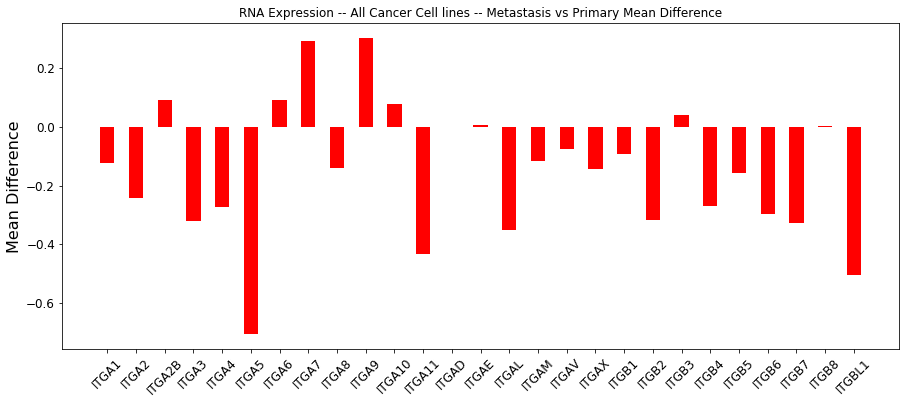

In [23]:
bar_vertical(rna_ttests['Integrin'], rna_ttests['mean_diff'],)
plt.figure(figsize=(15,6))
plt.bar(rna_ttests['Integrin'], rna_ttests['mean_diff'], width=0.5, color = 'red')
plt.xticks(Rotation=45)
plt.title('RNA Expression -- All Cancer Cell lines -- Metastasis vs Primary Mean Difference')
plt.ylabel('Mean Difference', size =16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

# plt.figure(figsize=(15,6))
# plt.bar(protein_ttests['Integrin'], protein_ttests['mean_diff'])
# plt.xticks(Rotation=90)
# plt.title('Protein Expression -- All Cancer Cell lines -- Metastasis vs Primary Mean Difference')
# plt.ylabel('Mean Difference', size =14)
# plt.show()

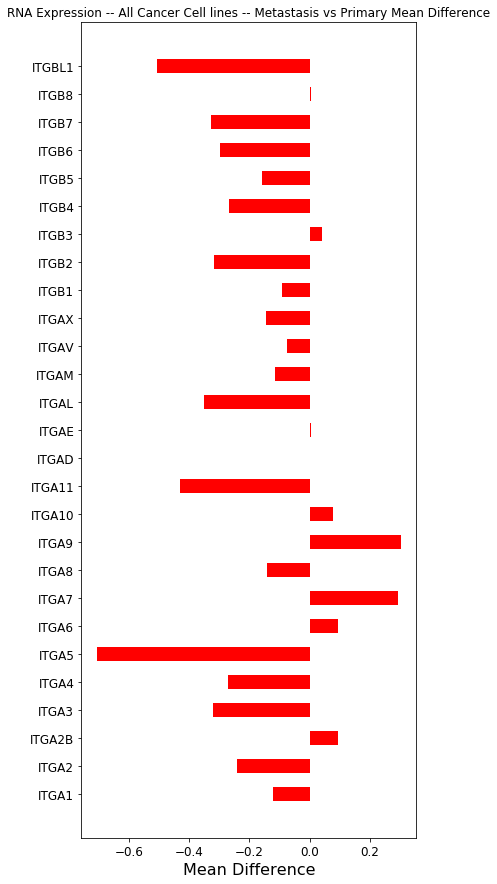

In [24]:
plt.figure(figsize=(6,15))
plt.barh(rna_ttests['Integrin'], rna_ttests['mean_diff'], height=0.5, color = 'red')
plt.title('RNA Expression -- All Cancer Cell lines -- Metastasis vs Primary Mean Difference')
plt.xlabel('Mean Difference', size =16)
plt.tick_params(axis='both', which='major', labelsize=12)
# plt.xlim(-1.5,1.5)
plt.show()

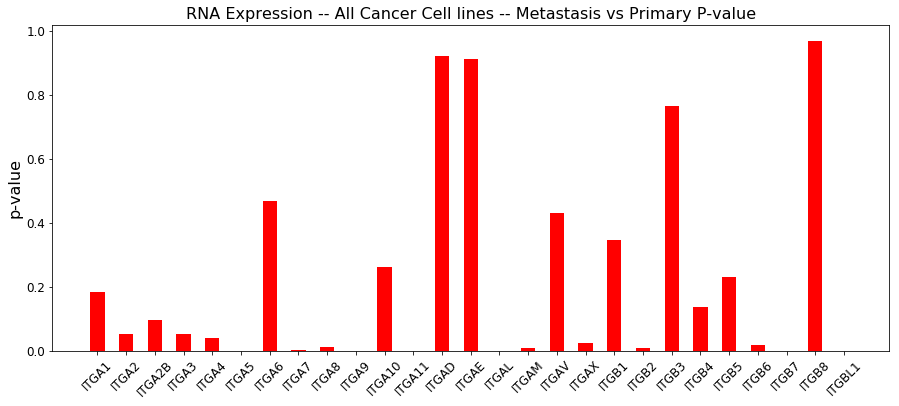

In [30]:
plt.figure(figsize=(15,6))
plt.bar(rna_ttests['Integrin'], (rna_ttests['ttest_p']), width = 0.5, color = 'red')
plt.xticks(Rotation=45)
plt.title('RNA Expression -- All Cancer Cell lines -- Metastasis vs Primary P-value', size=16)
plt.ylabel('p-value', size =16)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()


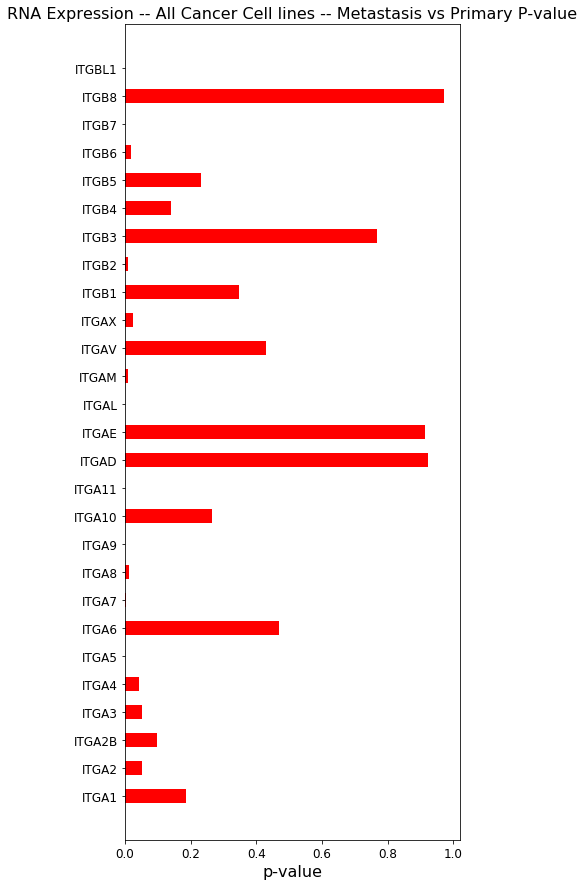

In [26]:
plt.figure(figsize=(6,15))
plt.barh(rna_ttests['Integrin'], (rna_ttests['ttest_p']), height = 0.5, color = 'red')
# plt.xticks(Rotation=90)
plt.title('RNA Expression -- All Cancer Cell lines -- Metastasis vs Primary P-value', size=16)
plt.xlabel('p-value', size =16)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

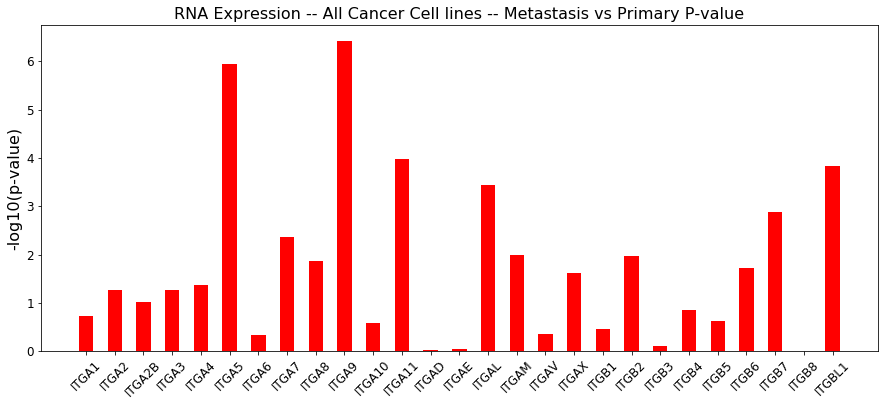

In [31]:
plt.figure(figsize=(15,6))
plt.bar(rna_ttests['Integrin'], rna_ttests['log10_p-value'], width = 0.5, color = 'red')
plt.xticks(Rotation=45)
plt.title('RNA Expression -- All Cancer Cell lines -- Metastasis vs Primary P-value', size=16)
plt.ylabel('-log10(p-value)', size =16)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()


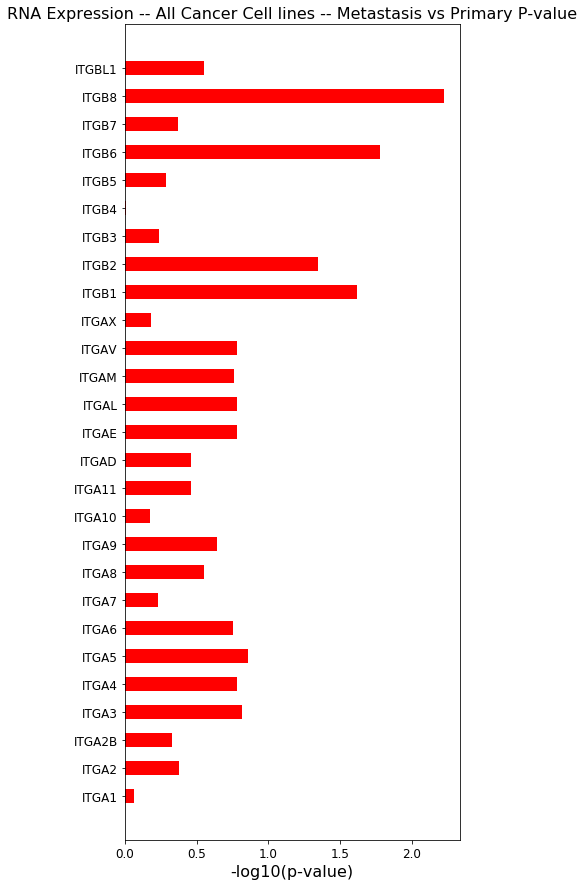

In [16]:
plt.figure(figsize=(6,15))
plt.barh(rna_ttests['Integrin'], rna_ttests['log10_p-value'], height = 0.5, color = 'red')
# plt.xticks(Rotation=90)
plt.title('RNA Expression -- All Cancer Cell lines -- Metastasis vs Primary P-value', size=16)
plt.xlabel('-log10(p-value)', size =16)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()


In [14]:
rna_data.columns

Index(['ACH-001113', 'ACH-001289', 'ACH-001339', 'ACH-001538', 'ACH-000242',
       'ACH-000708', 'ACH-000327', 'ACH-000233', 'ACH-000461', 'ACH-000705',
       ...
       'ACH-000114', 'ACH-000402', 'ACH-000036', 'ACH-000973', 'ACH-001128',
       'ACH-000750', 'ACH-000285', 'ACH-001858', 'ACH-001997', 'ACH-000052'],
      dtype='object', name='Unnamed: 0', length=1377)

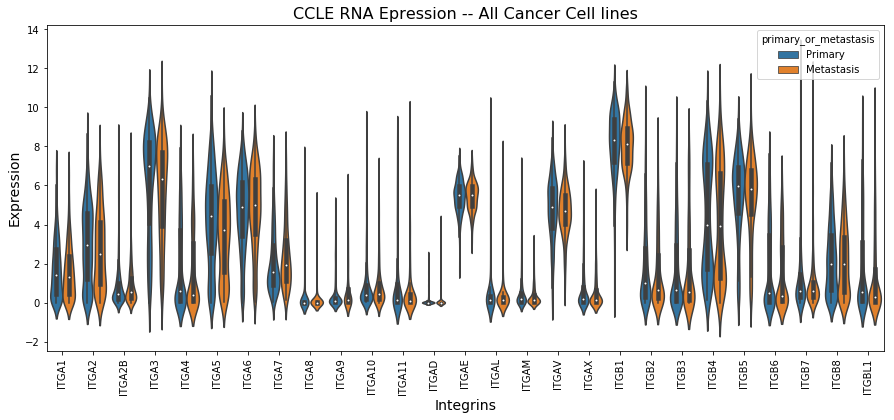

In [17]:
# the following line put all the integrin data in a long data fram to put in a 
# proper format for making the violin plot
integrins_rna_data_long = pd.melt(integrins_rna_data, value_vars=rna_names, id_vars='primary_or_metastasis')
plt.figure(figsize=(15,6))
sns.violinplot(x='variable', y='value', hue='primary_or_metastasis', data=integrins_rna_data_long)
plt.xticks(Rotation=90)
plt.xlabel('Integrins',size=14)
plt.ylabel('Expression', size=14)
plt.title('CCLE RNA Epression -- All Cancer Cell lines', size=16)
plt.show()


In [ ]:
# the following line put all the integrin data in a long data fram to put in a 
# proper format for making the violin plot
integrins_rna_data_sig_long = pd.melt(integrins_rna_data_sig, value_vars=integrin_rna_sig, id_vars='primary_or_metastasis')
plt.figure(figsize=(15,6))
sns.violinplot(x='variable', y='value', hue='primary_or_metastasis', data=integrins_rna_data_sig_long)
plt.xticks(Rotation=90)
plt.xlabel('Integrins',size=14)
plt.ylabel('Expression', size=14)
plt.title('CCLE RNA Epression -- All Cancer Cell lines -- Integrin with Significantly Dirrefent Expression')
plt.show()


ROC curve for significantly different integrins among all cancer cell lines

The maximum accuracy was 0.5992217898832685 at a cutoff threshold of 11.585338153643704
This may be an adjusted threshold and not the actual expression level.
The maximum accuracy was 0.6001945525291829 at a cutoff threshold of 7.7788656311258855
This may be an adjusted threshold and not the actual expression level.
The maximum accuracy was 0.622568093385214 at a cutoff threshold of 1.819668183496456
This may be an adjusted threshold and not the actual expression level.
The maximum accuracy was 0.5992217898832685 at a cutoff threshold of 10.895863035369812
This may be an adjusted threshold and not the actual expression level.


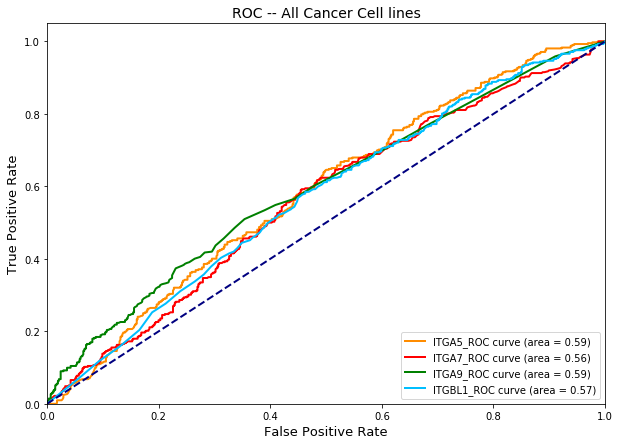

In [6]:
##This cell calculates the ROC curve for the desired integrin using RNA data
## There is a comment below about a change in the code that you may have to make
##   depending on whether or not you want metastasis or primary to be positive,
##   and whether or note metastasis or primary has higher expression.
from sklearn import metrics

rna_roc = ['ITGA5','ITGA7','ITGA9', 'ITGBL1']

roc = []
for count,integrin in enumerate(rna_roc):
    rna_keep = integrins_rna_data[["primary_or_metastasis","primary_disease",integrin]]
    primary = rna_keep[rna_keep["primary_or_metastasis"]=="Primary"]
    metastasis = rna_keep[rna_keep["primary_or_metastasis"]=="Metastasis"]




    data = np.concatenate((primary.iloc[:,2],metastasis.iloc[:,2]),axis=0)
## I add this line here because I want "metastasis" to be positive, and "primary" to be negative/control
##   The way the ROC is calculated requires that increasing values of the score, which is the data in this case,
##    increases the odds that the case is classified as metastasis/positive.
##   For this integrin (ITGB8), metastasis has lower expression, so make this adjustment to the data/score
##     so that higher values are more likely to be metastasis
## If "metastasis" has higher expression, comment out the following line.
###   or you can classify "primary" as positive.
    
    if metastasis[integrin].mean() < primary[integrin].mean():
        data = max(data)-data
    disease = np.concatenate((primary.iloc[:,0],metastasis.iloc[:,0]),axis=0)
    fpr, tpr, thresholds = metrics.roc_curve(disease,data,pos_label="Metastasis")
    roc_auc = metrics.auc(fpr,tpr)
        
    positives = metastasis.shape[0]
    negatives = primary.shape[0]
    total = positives + negatives
    max_acc = 0
    max_thr = 0
    for i in range(len(thresholds)):
        acc = ((1-fpr[i])*negatives + tpr[i]*positives)/total
        if acc > max_acc:
            max_acc = acc
            max_thr = thresholds[i]

    roc.append([integrin,fpr,tpr,roc_auc,max_acc,max_thr])
    print("The maximum accuracy was",max_acc,"at a cutoff threshold of",max_thr)
    print("This may be an adjusted threshold and not the actual expression level.")

    
roc = pd.DataFrame(roc, columns=["integrin", "false_positive_rate", "true_positive_rate","area_under_curve",
                                 "max_accuracy", "max_threshold"])
roc
plt.figure(figsize=(10,7))
lw = 2
plt.plot(roc.iloc[0,1], roc.iloc[0,2], color='darkorange',
         lw=lw, label=roc.iloc[0,0]+'_ROC curve (area = %0.2f)' % roc.iloc[0,3])

plt.plot(roc.iloc[1,1], roc.iloc[1,2], color='red',
         lw=lw, label=roc.iloc[1,0]+'_ROC curve (area = %0.2f)' % roc.iloc[1,3])

plt.plot(roc.iloc[2,1], roc.iloc[2,2], color='green',
         lw=lw, label=roc.iloc[2,0]+'_ROC curve (area = %0.2f)' % roc.iloc[2,3])

plt.plot(roc.iloc[3,1], roc.iloc[3,2], color='deepskyblue',
         lw=lw, label=roc.iloc[3,0]+'_ROC curve (area = %0.2f)' % roc.iloc[3,3])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.title('ROC -- All Cancer Cell lines',size=14)
plt.legend(loc="lower right")
plt.show()

In [ ]:
# integrins_protein_data_long = pd.melt(integrins_protein_data_2, value_vars=protein_names, id_vars='primary_or_metastasis')
# integrins_protein_data_long.dropna(axis=0, inplace=True)
# # plt.figure(figsize=(15,6))
# # sns.violinplot(x='variable', y='value', hue='primary_or_metastasis', data=integrins_protein_data_long)
# # plt.xticks(Rotation=90)
# # plt.xlabel('Integrins',size=14)
# # plt.title('CCLE Protein Epression')
# # plt.show()

# Breast Cancer Cell Lines

t-test pefromed only on breast cancer cell lines

In [32]:
#Get lists of integrin names in the same order
from scipy.stats import ttest_ind


rna_names = ['ITGA1','ITGA2','ITGA2B','ITGA3','ITGA4','ITGA5', 'ITGA6','ITGA6','ITGA7','ITGA8','ITGA9','ITGA10',
             'ITGA11','ITGAD','ITGAE','ITGAL','ITGAM','ITGAV','ITGAX','ITGB1','ITGB2','ITGB3','ITGB4','ITGB5',
             'ITGB6','ITGB7','ITGB8','ITGBL1']

protein_names = ['ITGA1','ITGA2','ITGA2B','ITGA3.1','ITGA3.2','ITGA4','ITGA5','ITGA6.1','ITGA6.2','ITGA7',
                 'ITGA8','ITGA9', 'ITGA10','ITGA11','ITGAL','ITGAM','ITGAV','ITGAX','ITGB1','ITGB2','ITGB3','ITGB4',
                 'ITGB5','ITGB6','ITGB7','ITGB8','ITGBL1']


# ttest on rna data

breast_rna_ttests = []
breast_rna_ttests_sig = []
breast_integrin_rna_sig = []
breast_integrins_rna_data_sig = integrins_rna_data[["primary_or_metastasis","primary_disease"]]


for i in range(len(rna_names)):
#   keeps the primary_or_metastasis column and onr of the integrin columns
    rna_keep = integrins_rna_data[["primary_or_metastasis","primary_disease", rna_names[i]]]
#   stores only primary samples in "primary" variable
    primary = rna_keep[rna_keep["primary_or_metastasis"]=="Primary"]
    primary_breast = primary[primary["primary_disease"]=="Breast Cancer"]
#   stores only metastasis samples in "metastasis" variable
    metastasis = rna_keep[rna_keep["primary_or_metastasis"]=="Metastasis"]
    metastasis_breast = metastasis[metastasis["primary_disease"]=="Breast Cancer"]
    temp = []
    temp.append(rna_names[i])
    temp.append(primary_breast.iloc[:,2].mean())
    temp.append(primary_breast.iloc[:,2].std())
    temp.append(metastasis_breast.iloc[:,2].mean())
    temp.append(metastasis_breast.iloc[:,2].std())
    temp.append(metastasis_breast.iloc[:,2].mean()-primary_breast.iloc[:,2].mean())
    tout = ttest_ind(primary_breast.iloc[:,2].to_list(),metastasis_breast.iloc[:,2].to_list(),nan_policy='omit')
    temp.append(tout[0])
    temp.append(tout[1])
    temp.append(-math.log10(tout[1]))
    breast_rna_ttests.append(temp)
    if tout[1] < 0.01:
        breast_rna_ttests_sig.append(temp)
        breast_integrin_rna_sig.append(rna_names[i])
        breast_integrins_rna_data_sig = breast_integrins_rna_data_sig.join(integrins_rna_data[rna_names[i]])

breast_rna_ttests = pd.DataFrame(breast_rna_ttests,columns=["Integrin","breast_prim_mean","breast_prim_std","breast_meta_mean",
                                                            "breast_meta_std","breast_mean_diff", "breast_ttest_stat",
                                                            "breast_ttest_p", "breast_log10_p-value"])
# breast_rna_ttests.to_csv('/home/sgomrok/Integrin_Exp/CCLE/Primary_vs_Metastatsis/rna_primary_metastasis_breast_cancer_ttest.csv')

breast_rna_ttests_sig = pd.DataFrame(breast_rna_ttests_sig,columns=["Integrin","breast_prim_mean","breast_prim_std","breast_meta_mean",
                                                            "breast_meta_std","breast_mean_diff", "breast_ttest_stat",
                                                            "breast_ttest_p", "breast_log10_p-value"])

breast_integrins_rna_data_sig = breast_integrins_rna_data_sig[breast_integrins_rna_data_sig["primary_disease"]=="Breast Cancer"]
breast_rna_ttests
# ############################################################################################################################

# # ttest on protein data

# breast_protein_ttests=[]
# for i in range(len(protein_names)):
#     protein_keep = integrins_protein_data[["primary_or_metastasis", "primary_disease", protein_names[i]]]
#     primary = protein_keep[protein_keep["primary_or_metastasis"]=="Primary"]
#     primary_breast = primary[primary["primary_disease"]=="Breast Cancer"]
#     metastasis = protein_keep[protein_keep["primary_or_metastasis"]=="Metastasis"]
#     metastasis_breast = metastasis[metastasis["primary_disease"]=="Breast Cancer"]
#     temp = []
#     temp.append(protein_names[i])
#     temp.append(primary_breast.iloc[:,2].mean())
#     temp.append(primary_breast.iloc[:,2].std())
#     temp.append(metastasis_breast.iloc[:,2].mean())
#     temp.append(metastasis_breast.iloc[:,2].std())
#     temp.append(metastasis_breast.iloc[:,2].mean()-primary_breast.iloc[:,2].mean())
#     tout = ttest_ind(primary_breast.iloc[:,2].to_list(),metastasis_breast.iloc[:,2].to_list(),nan_policy='omit')
#     temp.append(tout[0])
#     temp.append(tout[1])
#     breast_protein_ttests.append(temp)



# breast_protein_ttests = pd.DataFrame(breast_protein_ttests,columns=["Integrin","breast_prim_mean","breast_prim_std","breast_meta_mean",
#                                                       "breast_meta_std", "breast_mean_diff",
#                                                       "breast_ttest_stat","breast_ttest_p"])
# breast_protein_ttests.to_csv('/home/sgomrok/Integrin_Exp/CCLE/Primary_vs_Metastatsis/protein_primary_metastasis_breast_cancer_ttest.csv')


,Integrin,breast_prim_mean,breast_prim_std,breast_meta_mean,breast_meta_std,breast_mean_diff,breast_ttest_stat,breast_ttest_p,breast_log10_p-value
0,ITGA1,0.787264,1.020697,0.842289,1.342764,0.055025,-0.177562,0.859675,0.065666
1,ITGA2,2.799476,1.420085,2.496841,1.483532,-0.302635,0.809608,0.421418,0.375286
2,ITGA2B,1.066611,0.920792,0.897157,0.901297,-0.169454,0.724525,0.471607,0.326420
3,ITGA3,5.948969,1.723863,5.287819,1.817789,-0.661150,1.449336,0.152538,0.816621
4,ITGA4,1.238160,1.600601,0.730244,1.228073,-0.507916,1.401180,0.166399,0.778850
5,ITGA5,3.554022,2.210994,2.788522,1.770137,-0.765500,1.501610,0.138531,0.858452
6,ITGA6,4.270461,1.385159,3.669356,1.939829,-0.601105,1.369330,0.176086,0.754275
7,ITGA6,4.270461,1.385159,3.669356,1.939829,-0.601105,1.369330,0.176086,0.754275
8,ITGA7,1.443377,0.756079,1.566398,0.956603,0.123021,-0.549967,0.584418,0.233276
9,ITGA8,0.206592,0.973278,0.022456,0.039169,-0.184136,1.087429,0.281270,0.550877


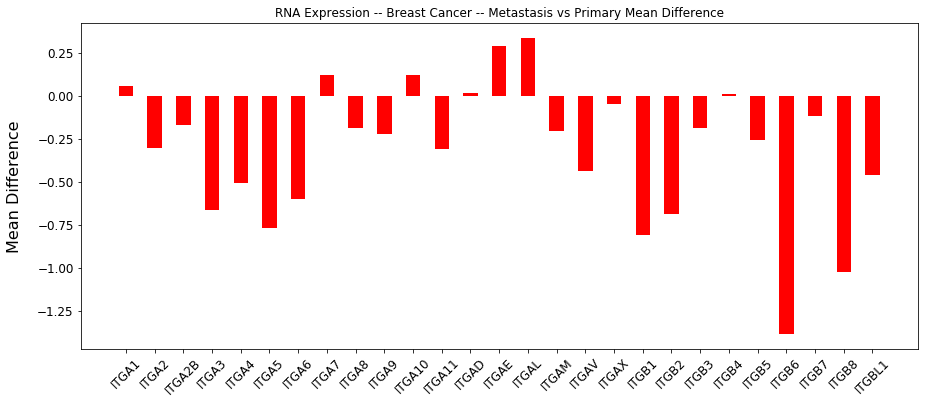

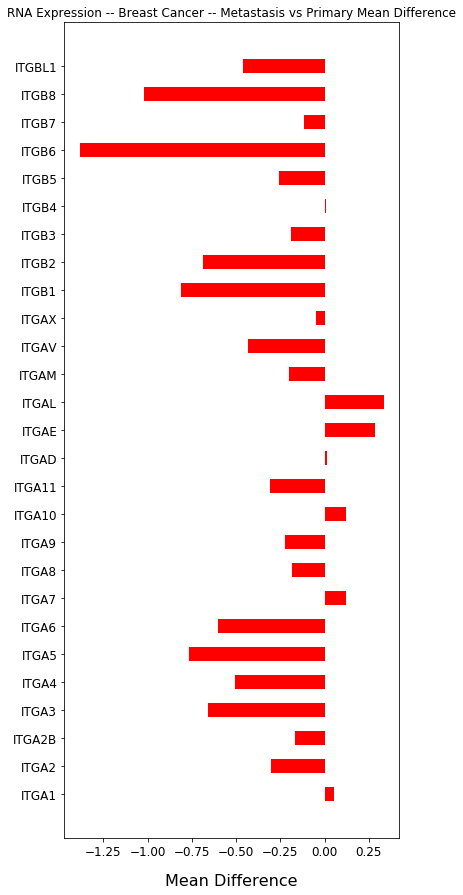

In [59]:
bar_vertical(breast_rna_ttests['Integrin'], breast_rna_ttests['breast_mean_diff'],
            'RNA Expression -- Breast Cancer -- Metastasis vs Primary Mean Difference',
            'Mean Difference')
bar_horizontal(breast_rna_ttests['Integrin'], breast_rna_ttests['breast_mean_diff'],
              'RNA Expression -- Breast Cancer -- Metastasis vs Primary Mean Difference',
              'Mean Difference')

# bar_vertical(breast_protein_ttests['Integrin'], breast_protein_ttests['breast_mean_diff'],
#             'Protein Expression -- Breast Cancer -- Metastasis vs Primary Mean Difference',
#             'Mean Difference')

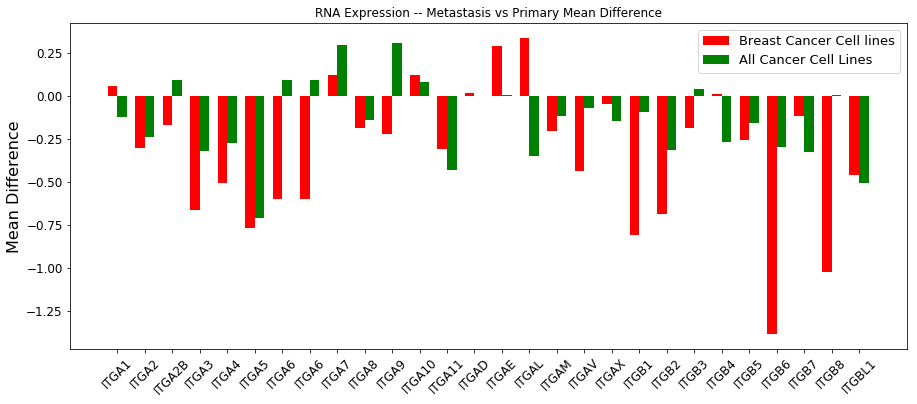

In [39]:

x_int = np.arange(len(breast_rna_ttests['Integrin']))
width = 0.35
fig, ax = plt.subplots(figsize=(15,6))
rects1 = ax.bar(x_int - width/2, breast_rna_ttests['breast_mean_diff'], width, label='Breast Cancer Cell lines', color = 'red')
rects2 = ax.bar(x_int + width/2, rna_ttests['mean_diff'], width, label='All Cancer Cell Lines', color = 'green')


ax.set_ylabel('Mean Difference', fontsize = 16)
ax.set_title('RNA Expression -- Metastasis vs Primary Mean Difference')
ax.set_xticks(x_int)
ax.set_xticklabels((breast_rna_ttests['Integrin'].tolist()),Rotation=45)
ax.tick_params(axis='both', which='major', labelsize=12)

ax.legend(fontsize=13)

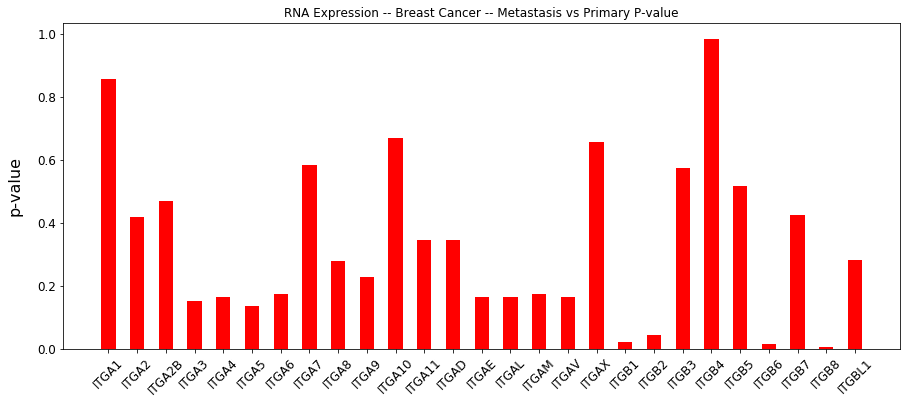

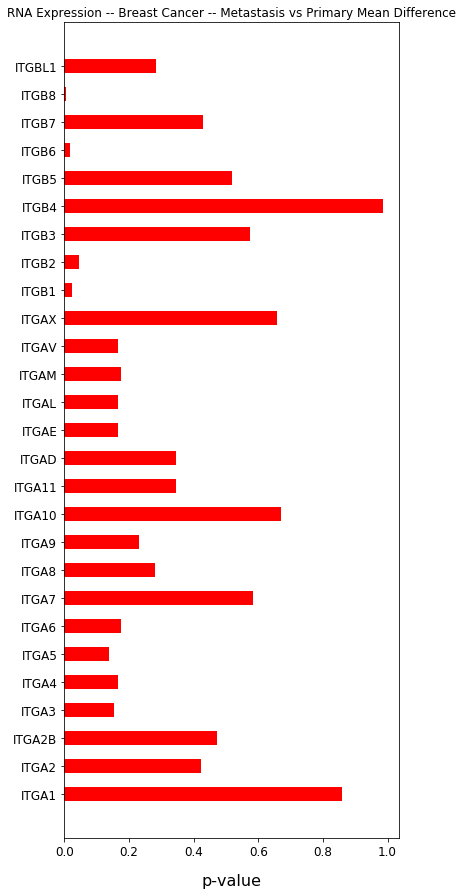

In [58]:
bar_vertical(breast_rna_ttests['Integrin'], breast_rna_ttests['breast_ttest_p'],
            'RNA Expression -- Breast Cancer -- Metastasis vs Primary P-value',
            'p-value')

bar_horizontal(breast_rna_ttests['Integrin'], breast_rna_ttests['breast_ttest_p'],
            'RNA Expression -- Breast Cancer -- Metastasis vs Primary P-value',
            'p-value')

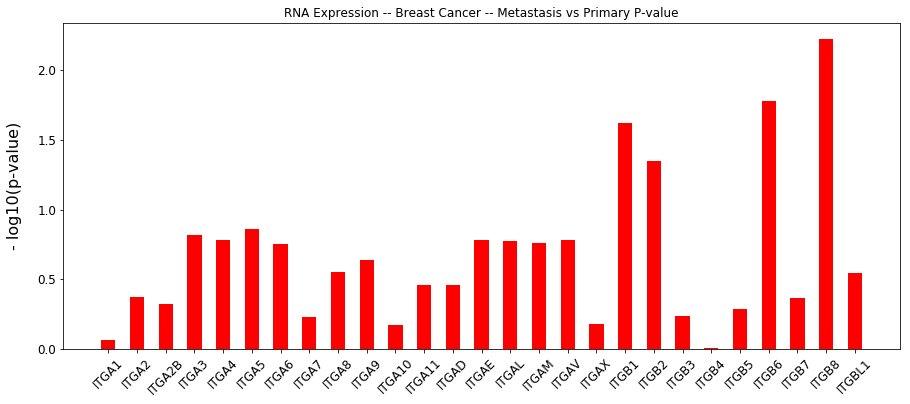

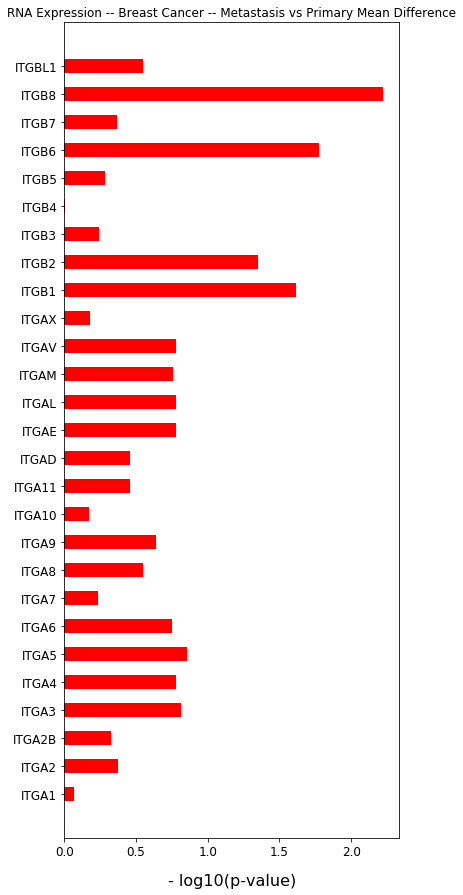

In [64]:
bar_vertical(breast_rna_ttests['Integrin'], breast_rna_ttests['breast_log10_p-value'],
            'RNA Expression -- Breast Cancer -- Metastasis vs Primary P-value',
            '- log10(p-value)')
bar_horizontal(breast_rna_ttests['Integrin'], breast_rna_ttests['breast_log10_p-value'],
            'RNA Expression -- Breast Cancer -- Metastasis vs Primary P-value',
            '- log10(p-value)')

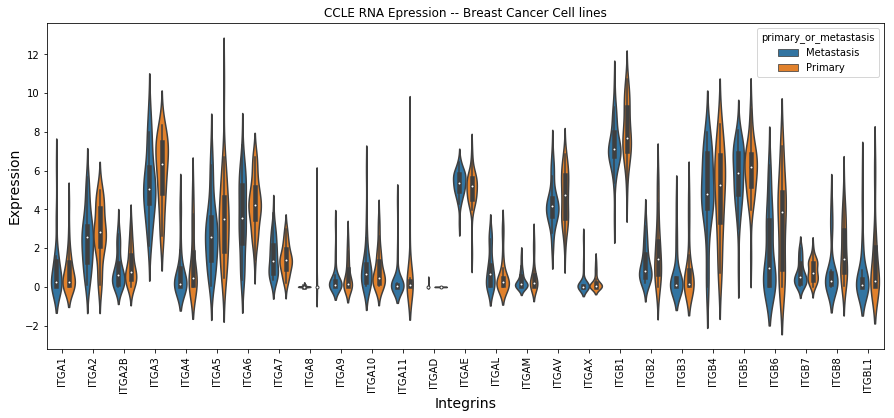

In [65]:
# the following line put all the integrin data in a long data fram to put in a 
# proper format for making the violin plot
integrins_rna_data_breast = integrins_rna_data[integrins_rna_data["primary_disease"]=="Breast Cancer"]
integrins_rna_data_breast_long = pd.melt(integrins_rna_data_breast, value_vars=rna_names, id_vars='primary_or_metastasis')
plt.figure(figsize=(15,6))
sns.violinplot(x='variable', y='value', hue='primary_or_metastasis', data=integrins_rna_data_breast_long)
plt.xticks(Rotation=90)
plt.xlabel('Integrins',size=14)
plt.ylabel('Expression', size=14)
plt.title('CCLE RNA Epression -- Breast Cancer Cell lines')
plt.show()


In [ ]:
# the following line put all the integrin data in a long data fram to put in a 
# proper format for making the violin plot

breast_integrins_rna_data_sig_long = pd.melt(breast_integrins_rna_data_sig, value_vars=breast_integrin_rna_sig, id_vars='primary_or_metastasis')
plt.figure(figsize=(15,6))
sns.violinplot(x='variable', y='value', hue='primary_or_metastasis', data=breast_integrins_rna_data_sig_long)
plt.xticks(Rotation=90)
plt.xlabel('Integrins',size=14)
plt.ylabel('Expression', size=14)
plt.title('CCLE RNA Epression -- Breast Cancer Cell lines')
plt.show()


The maximum accuracy was 0.6229508196721312 at a cutoff threshold of 4.87921563716567
This may be an adjusted threshold and not the actual expression level.
The maximum accuracy was 0.639344262295082 at a cutoff threshold of 0.6599245584023783
This may be an adjusted threshold and not the actual expression level.
The maximum accuracy was 0.6885245901639344 at a cutoff threshold of 3.7974192199627472
This may be an adjusted threshold and not the actual expression level.
The maximum accuracy was 0.7704918032786885 at a cutoff threshold of 4.361200752756264
This may be an adjusted threshold and not the actual expression level.


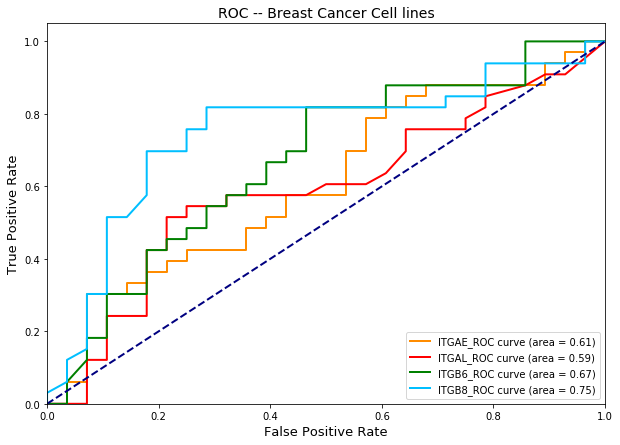

In [7]:
##This cell calculates the ROC curve for the desired integrin using RNA data
## There is a comment below about a change in the code that you may have to make
##   depending on whether or not you want metastasis or primary to be positive,
##   and whether or note metastasis or primary has higher expression.
from sklearn import metrics

rna_roc = ['ITGAE','ITGAL', 'ITGB6', 'ITGB8']

roc = []
for count,integrin in enumerate(rna_roc):
    rna_keep = integrins_rna_data[["primary_or_metastasis","primary_disease",integrin]]
    primary = rna_keep[rna_keep["primary_or_metastasis"]=="Primary"]
    primary_breast = primary[primary["primary_disease"]=="Breast Cancer"]
    metastasis = rna_keep[rna_keep["primary_or_metastasis"]=="Metastasis"]
    metastasis_breast = metastasis[metastasis["primary_disease"]=="Breast Cancer"]

# print(primary_breast)
# print(metastasis_breast)


    data = np.concatenate((primary_breast.iloc[:,2],metastasis_breast.iloc[:,2]),axis=0)
## I add this line here because I want "metastasis" to be positive, and "primary" to be negative/control
##   The way the ROC is calculated requires that increasing values of the score, which is the data in this case,
##    increases the odds that the case is classified as metastasis/positive.
##   For this integrin (ITGB8), metastasis has lower expression, so make this adjustment to the data/score
##     so that higher values are more likely to be metastasis
## If "metastasis" has higher expression, comment out the following line.
###   or you can classify "primary" as positive.
    
    if metastasis_breast[integrin].mean() < primary_breast[integrin].mean():
        data = max(data)-data
    disease = np.concatenate((primary_breast.iloc[:,0],metastasis_breast.iloc[:,0]),axis=0)
    fpr, tpr, thresholds = metrics.roc_curve(disease,data,pos_label="Metastasis")
    roc_auc = metrics.auc(fpr,tpr)
        
    positives = metastasis_breast.shape[0]
    negatives = primary_breast.shape[0]
    total = positives + negatives
    max_acc = 0
    max_thr = 0
    for i in range(len(thresholds)):
        acc = ((1-fpr[i])*negatives + tpr[i]*positives)/total
        if acc > max_acc:
            max_acc = acc
            max_thr = thresholds[i]

    roc.append([integrin,fpr,tpr,roc_auc,max_acc,max_thr])
    print("The maximum accuracy was",max_acc,"at a cutoff threshold of",max_thr)
    print("This may be an adjusted threshold and not the actual expression level.")

    
ROC = pd.DataFrame(roc, columns=["integrin", "false_positive_rate", "true_positive_rate","area_under_curve",
                                 "max_accuracy", "max_threshold"])
ROC.false_positive_rate[0]

plt.figure(figsize=(10,7))
lw = 2
plt.plot(ROC.iloc[0,1], ROC.iloc[0,2], color='darkorange',
         lw=lw, label=ROC.iloc[0,0]+'_ROC curve (area = %0.2f)' % ROC.iloc[0,3])

plt.plot(ROC.iloc[1,1], ROC.iloc[1,2], color='red',
         lw=lw, label=ROC.iloc[1,0]+'_ROC curve (area = %0.2f)' % ROC.iloc[1,3])

plt.plot(ROC.iloc[2,1], ROC.iloc[2,2], color='green',
         lw=lw, label=ROC.iloc[2,0]+'_ROC curve (area = %0.2f)' % ROC.iloc[2,3])

plt.plot(ROC.iloc[3,1], ROC.iloc[3,2], color='deepskyblue',
         lw=lw, label=ROC.iloc[3,0]+'_ROC curve (area = %0.2f)' % ROC.iloc[3,3])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.title('ROC -- Breast Cancer Cell lines',size=14)
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc.loc[roc["integrin"] == 'ITGAE (3682)']["false_positive_rate"].values[0]

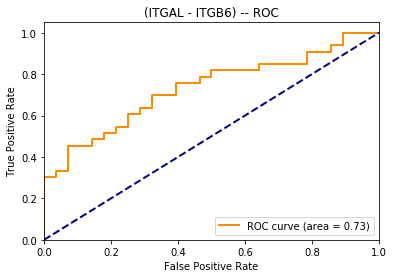

In [9]:
##This cell calculates the ROC curve for the desired integrin using RNA data
## There is a comment below about a change in the code that you may have to make
##   depending on whether or not you want metastasis or primary to be positive,
##   and whether or note metastasis or primary has higher expression.
from sklearn import metrics

# rna_roc = ['ITGAE (3682)','ITGAL (3683)', 'ITGB6 (3694)', 'ITGB8 (3696)']

over = "ITGAL"
under = "ITGB6"

rna_keep_over = integrins_rna_data[["primary_or_metastasis","primary_disease", over]]
primary_over = rna_keep_over[rna_keep_over["primary_or_metastasis"]=="Primary"]
primary_breast_over = primary_over[primary_over["primary_disease"]=="Breast Cancer"]
metastasis_over = rna_keep_over[rna_keep_over["primary_or_metastasis"]=="Metastasis"]
metastasis_breast_over = metastasis_over[metastasis_over["primary_disease"]=="Breast Cancer"]


rna_keep_under = integrins_rna_data[["primary_or_metastasis","primary_disease", under]]
primary_under = rna_keep_under[rna_keep_under["primary_or_metastasis"]=="Primary"]
primary_breast_under = primary_under[primary_under["primary_disease"]=="Breast Cancer"]
metastasis_under = rna_keep_under[rna_keep_under["primary_or_metastasis"]=="Metastasis"]
metastasis_breast_under = metastasis_under[metastasis_under["primary_disease"]=="Breast Cancer"]


#print(primary_breast)
#print(metastasis_breast)
primary_breast = primary_breast_over.iloc[:,2] - primary_breast_under.iloc[:,2]
metastasis_breast = metastasis_breast_over.iloc[:,2] - metastasis_breast_under.iloc[:,2]

data = np.concatenate((primary_breast, metastasis_breast),axis=0)
primary_breast_mean = primary_breast.mean()
metastasis_breast_mean = metastasis_breast.mean()


if primary_breast.mean() > metastasis_breast.mean():
    data = max(data)-data
    
disease = np.concatenate((primary_breast_over.iloc[:,0], metastasis_breast_over.iloc[:,0]),axis=0)

fpr, tpr, thresholds = metrics.roc_curve(disease,data,pos_label="Metastasis")
roc_auc = metrics.auc(fpr,tpr)

positives = metastasis_breast.shape[0]
negatives = primary_breast.shape[0]
total = positives + negatives
max_acc = 0
max_thr = 0
for i in range(len(thresholds)):
    acc = ((1-fpr[i])*negatives + tpr[i]*positives)/total
    if acc > max_acc:
        max_acc = acc
        max_thr = thresholds[i]
# print("The maximum accuracy was",max_acc,"at a cutoff threshold of",max_thr)
# print("This may be an adjusted threshold and not the actual expression level.")
    
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('('+over+' - '+under+')'+' -- ROC')
plt.legend(loc="lower right")
plt.show()

# # fpr, tpr, thresholds = metrics.roc_curve(np.array(, scores, pos_label=2)


In [124]:
thresholds

array([ 3.99483829,  2.99483829,  1.69673575,  1.17887396,  0.81420859,
        0.62506416,  0.58953523,  0.56363399,  0.40096231,  0.39031507,
        0.1069152 ,  0.0257631 , -0.01367494, -0.10744629, -0.37439551,
       -0.62003527, -0.81526012, -2.30705482, -2.31045531, -2.63639074,
       -3.19284815, -3.98327036, -4.34556365, -5.1354336 ])

In [119]:
data

array([ 2.99483829, -3.59427024,  1.50380536, -2.63491432,  0.56363399,
       -1.54314233, -2.63639074, -3.9607057 , -3.98327036, -3.86825251,
       -0.47770153, -3.65961121, -0.10744629,  1.17887396, -2.30705482,
        0.39031507, -0.51576499,  0.62506416, -0.04730571, -0.62003527,
       -5.1354336 , -2.44947814, -0.89566334, -2.58014548, -0.89530262,
       -0.84369677, -1.96017402,  0.0257631 ,  1.05444778,  2.12432814,
        0.92599942, -4.34556365,  0.1069152 ,  2.6169729 , -0.01367494,
        0.92056553, -0.10893437, -0.32192809,  0.25113232,  0.83995959,
       -0.7398481 , -0.81526012, -0.68939991, -2.84097648, -0.21459405,
        0.81420859, -0.37439551, -2.98000852,  0.15335078,  0.89214401,
        0.40096231,  2.26788826,  0.58953523,  1.69673575,  1.70729804,
        2.22719981, -3.19284815, -2.31045531,  2.24845108, -4.22881869,
        2.00662294])